<a href="https://colab.research.google.com/github/kaushik3012/EvoDiff_active_site/blob/main/Evodiff_Kaushik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download EvoDiff Program and scripts

In [1]:
!git clone https://kaushik3012@github.com/kaushik3012/EvoDiff_active_site.git

Cloning into 'EvoDiff_active_site'...
remote: Enumerating objects: 407, done.
remote: Counting objects: 100% (407/407), done.
remote: Compressing objects: 100% (329/329), done.
remote: Total 407 (delta 276), reused 206 (delta 78), pack-reused 0 (from 0)
Receiving objects: 100% (407/407), 9.44 MiB | 37.89 MiB/s, done.
Resolving deltas: 100% (276/276), done.


In [2]:
%cd /content/EvoDiff_active_site

/content/EvoDiff_active_site


## Exploratory Data Analysis of the Active site dataset

In [24]:
import pandas as pd
df = pd.read_excel('uniprotkb_active_site_AND_reviewed_true_2024_05_31.xlsx')

df.head()

Entry  Reviewed   Entry Name  \
0  A0A009IHW8  reviewed  ABTIR_ACIB9   
1  A0A023I7E1  reviewed   ENG1_RHIMI   
2  A0A024SC78  reviewed  CUTI1_HYPJR   
3  A0A044RE18  reviewed    BLI_ONCVO   
4  A0A059TC02  reviewed   CCR1_PETHY   

                                       Protein names       Gene Names  \
0  2' cyclic ADP-D-ribose synthase AbTIR (2'cADPR...        J512_3302   
1  Glucan endo-1,3-beta-D-glucosidase 1 (Endo-1,3...      ENG1 LAM81A   
2                             Cutinase (EC 3.1.1.74)  M419DRAFT_76732   
3       Endoprotease bli (EC 3.4.21.75) (Blisterase)              Bli   
4  Cinnamoyl-CoA reductase 1 (Ph-CCR1) (EC 1.2.1....             CCR1   

                                            Organism  Length  \
0           Acinetobacter baumannii (strain 1295743)     269   
1                                  Rhizomucor miehei     796   
2  Hypocrea jecorina (strain ATCC 56765 / BCRC 32...     248   
3                                Onchocerca volvulus     693   
4                          Petunia hybrida (Petunia)     333   

                                         Active site  \
0  ACT_SITE 208; /evidence="ECO:0000255|PROSITE-P...   
1  ACT_SITE 500; /evidence="ECO:0000255|PROSITE-P...   
2  ACT_SITE 164; /note="Nucleophile"; /evidence="...   
3  ACT_SITE 201; /note="Charge relay system"; /ev...   
4  ACT_SITE 161; /note="Proton donor"; /evidence=...   

                                            Sequence         EC number  \
0  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  3.2.2.-; 3.2.2.6   
1  MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...          3.2.1.39   
2  MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...          3.1.1.74   
3  MYWQLVRILVLFDCLQKILAIEHDSICIADVDDACPEPSHTVMRLR...         3.4.21.75   
4  MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...          1.2.1.44   

                                       Rhea ID  
0             RHEA:75299 RHEA:16301 RHEA:19849  
1                                          NaN  
2                                          NaN  
3                                          NaN  
4  RHEA:64648 RHEA:64652 RHEA:64656 RHEA:10620

Number of Data points without any active site residues

In [25]:
df['Active site'].isna().sum()

11422

Protein Sequence with the largest length

In [26]:
df[df['Length']>10000]

Entry  Reviewed  Entry Name  \
8583  A0A348AXX4  reviewed  KK1B_CURCL   

                                          Protein names            Gene Names  \
8583  Nonribosomal peptide synthetase kk1B (NRPS kk1...  kk1B NRPS TRAF135001   

                Organism  Length Active site  \
8583  Curvularia clavata   13041         NaN   

                                               Sequence         EC number  \
8583  MASDINTHPEGATKFWQQHFDGLNASVFPALSSHLTVPRPNAQTAH...  2.1.1.-; 6.3.2.-   

     Rhea ID  
8583     NaN

Distribution of Length of Protein Sequences

<Axes: ylabel='Frequency'>

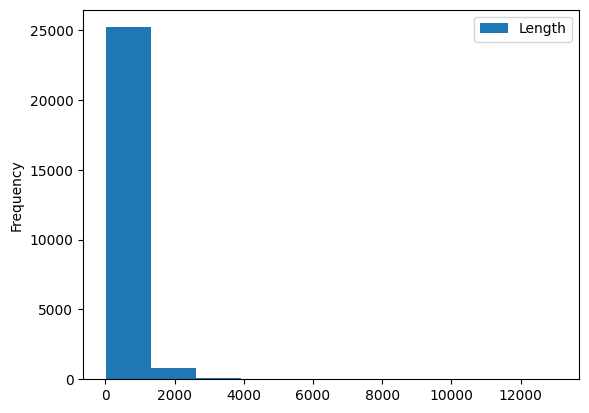

In [27]:
df.plot(kind='hist')

Distribution of Number of Active Site Residues

In [28]:
import plotly.express as px

fig = px.histogram(df, x="Length")
fig.update_layout(dict(xaxis_title='Length of Sequences', yaxis_title='Count'))
fig.show()

Distribution of the Protein Classes (EC Number)

In [29]:
import numpy as np

df['EC number'].fillna(-1, inplace=True)
df_sub = df['EC number'].apply(lambda x: x.split('; ') if x!=-1 else -1).explode().apply(lambda x: str(x).split('.')[0])
df_sub.reset_index(drop=True, inplace=True)
df_sub = df_sub.apply(lambda x: np.nan if int(x)==-1 else x)
df_sub.sort_values(ascending=True, inplace=True)
df_sub.reset_index(drop=True, inplace=True)
df_sub.fillna(-1, inplace=True)

In [30]:
import plotly.express as px

fig = px.histogram(df_sub, x="EC number")
fig.update_layout(dict(xaxis_title='EC number', yaxis_title='Count'))
fig.show()

Distribution of Number of Active Site Residues

In [31]:
df.dropna(subset=['Active site'], inplace=True)
df['Active site'] = df['Active site'].apply(lambda x: [int(i[9:]) for i in x.split('; ') if i.startswith('ACT_SITE')])
df['No of Active site'] = df['Active site'].apply(lambda x: len(x))

In [32]:
fig = px.histogram(df, x="No of Active site")
fig.update_layout(dict(xaxis_title='No of Active site', yaxis_title='Count'), bargap=0.2, xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1
    )
)
fig.update_traces(marker_color='#3D9970')
fig.show()

Distribution of Organisms

In [33]:
df['Organism'].value_counts()

Organism
Homo sapiens (Human)                                                       904
Mus musculus (Mouse)                                                       528
Arabidopsis thaliana (Mouse-ear cress)                                     386
Escherichia coli (strain K12)                                              337
Rattus norvegicus (Rat)                                                    320
                                                                          ... 
Trypanosoma congolense                                                       1
Canine parvovirus type 2 (isolate Dog/United States/CPV-N/1978) (CPV-2)      1
Nodamura virus (strain Mag115) (NoV)                                         1
Arthrobacter sp. (strain NRRL B3728)                                         1
Streptococcus mitis                                                          1
Name: count, Length: 3014, dtype: int64

In [34]:
df_top100 = df[df['Organism'].isin(df['Organism'].value_counts().index[:25])]

In [35]:
fig = px.pie(df_top100['Organism'], names='Organism')
fig.show()

Installing dependencies for k-merisation algorithm

In [ ]:
!pip install rdkit
!pip install Biopython
!pip install umap
!pip install umap-learn[plot]
!pip install holoviews
# !pip install -U ipykernel

In [22]:
# Importing all packages
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
#--------------------------------------------------#
import torch
from torch import nn
from torch.utils import data
from torch.nn.utils.weight_norm import weight_norm
#--------------------------------------------------#
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
#--------------------------------------------------#
import pickle
#--------------------------------------------------#
from typing import Union, List, Tuple, Sequence, Dict, Any, Optional, Collection
#--------------------------------------------------#



###################################################################################################################
###################################################################################################################
import json
import math
import argparse
import itertools

from tqdm import tqdm
from scipy import stats
from typing import List
from pathlib import Path
from functools import partial
#--------------------------------------------------#
import multiprocessing as mp
#--------------------------------------------------#
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score, classification_report, confusion_matrix, pairwise_distances, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import check_array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#--------------------------------------------------#
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
#--------------------------------------------------#
from Bio import pairwise2
#--------------------------------------------------#
from scipy.spatial.distance import cdist
#--------------------------------------------------#
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
#--------------------------------------------------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from rdkit.DataStructs import ConvertToNumpyArray

from sklearn.feature_extraction.text import CountVectorizer
from typing import List
from sklearn.cluster import DBSCAN  # Import DBSCAN

In [36]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda:0


Extracting the k-mer Features from protein sequences

In [37]:
import os
import math
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from sklearn.feature_extraction.text import CountVectorizer
from typing import List

# Function to categorize errors
def categorize_errors(true_values, estimated_values):
    categories = []
    for true_val, estimated_val in zip(true_values, estimated_values):
        percent_error = abs((true_val - estimated_val) / true_val) * 100

        if percent_error <= 50:
            categories.append(0)  # Error within the same order of magnitude
        elif 50 < percent_error <= 75:
            categories.append(1)  # Error within 1 order of magnitude
        elif 75 < percent_error <= 100:
            categories.append(2)  # Error within 2 orders of magnitude
        elif 100 < percent_error <= 1000:
            categories.append(3)  # Error within 3 orders of magnitude
        # Add more conditions as needed for higher orders of magnitude
        else:
            categories.append(4)  # Error greater than 3 orders of magnitude

    return categories

# Function to read sequences and compounds from CSV files in batches
def read_sequences_and_compounds_from_files(directory, batch_size=1000):
    sequences = []
    compounds = []
    predicted = []
    actual = []
    split = []

    for filename in os.listdir(directory):
        if filename.startswith("X05A_CV__result_KcatCore_Fold_") and filename.endswith("_epoch_25.csv"):
            file_path = os.path.join(directory, filename)
            batch_df = pd.read_csv(file_path, chunksize=batch_size)

            for df in batch_df:
                filtered_df = df[df['data_split'] == 'tr']
                if 'sequence' in filtered_df.columns and 'cmpd_smiles' in filtered_df.columns:
                    sequences.extend(filtered_df['sequence'].tolist())
                    compounds.extend(filtered_df['cmpd_smiles'].tolist())
                    predicted.extend(filtered_df['pred_value'].tolist())
                    actual.extend(filtered_df['real_value'].tolist())
                    split.extend(filtered_df['data_split'].tolist())

    # Calculate percentage error for each index
    predicted = [math.pow(10, value) for value in predicted]
    actual = [math.pow(10, value) for value in actual]
    categories = categorize_errors(actual, predicted)
    error = [abs((actual_val - predicted_val)) / actual_val * 100 for actual_val, predicted_val in
             zip(actual, predicted)]

    return sequences, compounds, predicted, actual, split, categories, error

# Define KMERFeaturizer class
class KMERFeaturizer:
    def __init__(self, ngram_min: int = 2, ngram_max: int = 4, unnormalized: bool = False):
        self.ngram_min = ngram_min
        self.ngram_max = ngram_max
        self.normalized = not (unnormalized)
        self.vectorizer = CountVectorizer(ngram_range=(self.ngram_min, self.ngram_max), analyzer='char')
        self.is_fit = False

    def featurize(self, seqs_list: List[str]) -> List[np.ndarray]:
        if not self.is_fit:
            self.vectorizer.fit(seqs_list)
            self.is_fit = True
        output = self.vectorizer.transform(seqs_list)
        output = np.asarray(output.todense())

        if self.normalized:
            output = output / output.sum(1).reshape(-1, 1)

        return list(output)

# Define MorganFeaturizer class
class MorganFeaturizer:
    def __init__(self):
        pass

    def _mol_to_fp(self, mol: Chem.Mol) -> np.ndarray:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        array = np.zeros((0,), dtype=np.int8)
        DataStructs.ConvertToNumpyArray(fp, array)
        return array

    def featurize(self, mols_list: List[str]) -> List[np.ndarray]:
        return [self._mol_to_fp(mol) for mol in mols_list]

# Initialize featurizers
kmer_featurizer = KMERFeaturizer()
morgan_featurizer = MorganFeaturizer()


In [38]:
all_sequences = df['Sequence'].tolist()

# Process sequences and compounds in batches
batch_size = 16  # Adjust as needed

seq_batches = [all_sequences[i:i + batch_size] for i in range(0, len(all_sequences), batch_size)]

seqs_feats = []

# Featurize sequences and compounds in batches
for seq_batch in seq_batches:
    seqs_feats_batch = kmer_featurizer.featurize(seq_batch)

    seqs_feats.extend(seqs_feats_batch)

# Convert lists to arrays
seqs_feats = np.array(seqs_feats)

print(seqs_feats.shape)

(14685, 11164)


In [39]:
df_feat = pd.DataFrame(seqs_feats, columns=[f'Sequence_{i}' for i in range(seqs_feats.shape[1])])

In [40]:
len(df_feat)

14685

PCA of protein features

In [41]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=2, whiten=True)
pca_result = pca.fit_transform(df_feat)


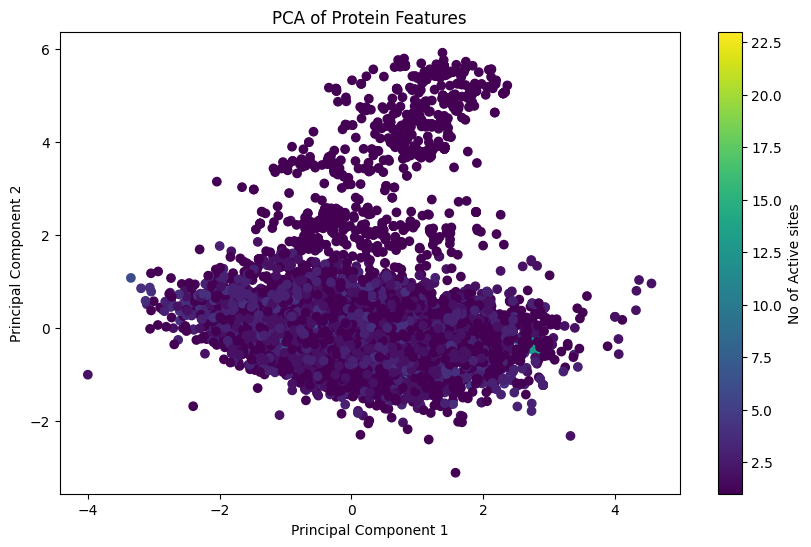

In [42]:
# Create a scatter plot of PCA results with logarithmic color scale
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=(df['No of Active site']), cmap='viridis')  # Use log1p for logarithmic scale
plt.colorbar(label='No of Active sites')
plt.title('PCA of Protein Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

t-SNE of protein features

In [43]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(df_feat)

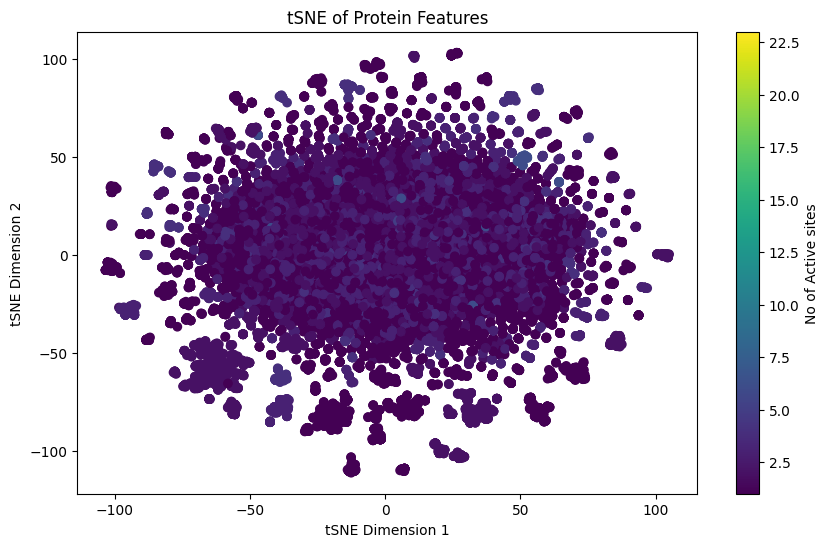

In [44]:
# Plotting t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['No of Active site'])  # Use log1p for logarithmic scale
plt.colorbar(label='No of Active sites')
plt.title('tSNE of Protein Features')
plt.xlabel('tSNE Dimension 1')
plt.ylabel('tSNE Dimension 2')
plt.show()

UMAP of protein features

In [45]:
# Perform UMAP
import umap
umap = umap.UMAP(n_components=2, random_state=0)
umap_result = umap.fit_transform(df_feat)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



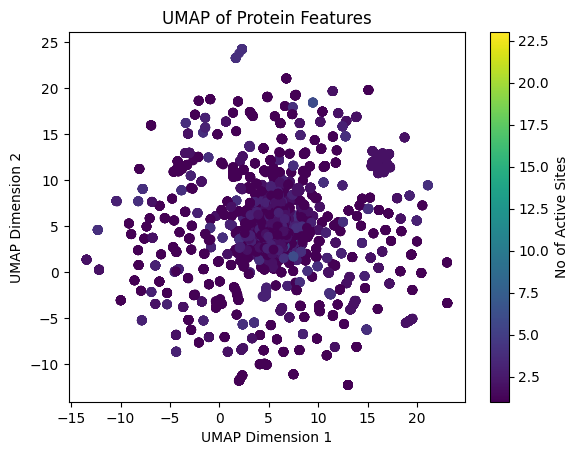

<Figure size 640x480 with 0 Axes>

In [46]:
# Plotting UMAP results
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=df['No of Active site'], cmap='viridis')  # Use log1p for logarithmic scale
plt.colorbar(label='No of Active Sites')
plt.title('UMAP of Protein Features')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()
plt.tight_layout()
plt.show()

DBScan clustering

In [ ]:
import umap

# Perform UMAP
umap_algo = umap.UMAP(n_components=2, n_jobs=-1)
umap_result = umap_algo.fit_transform(df_feat)  # Exclude the 'Error' column from UMAP

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
cluster_labels = dbscan.fit_predict(umap_result)


Text(0, 0.5, 'UMAP Dimension 2')

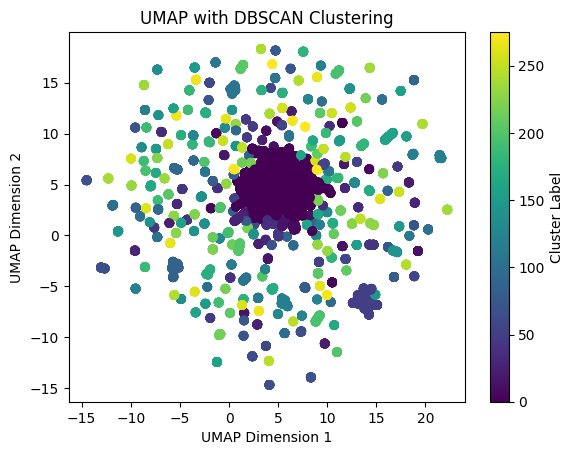

In [ ]:

# Plotting UMAP results with clustering labels
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=cluster_labels, cmap='viridis')  # Use cluster labels for coloring
plt.colorbar(label='Cluster Label')
plt.title('UMAP with DBSCAN Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

## Generating Sequences using EvoDiff

Install dependencies for EvoDiff

In [ ]:
!python install_dependencies.py

Generate Sequences in Fasta format using EvoDiff

In [96]:
import shutil
import os

if os.path.exists('generated_seqs'):
    shutil.rmtree('generated_seqs')

The *process_and_generate.py* script generates sequences based on the task.


---

The script takes the following arguments:

**--path** -> Enter the path to the active site data

**-n/--n_samples** -> Enter the number of original sequences to sample from active site dataset

**-k (optional, default=5)** -> Enter the number of protein sequences to generate per original sample

**-m/--model (optional, default=OADM_38M)** -> Enter the number of protein sequences to generate per original sample

**-a/--activesite (optional)** -> Toggle Active Site Data integration (without this, it will mutate randomly)

**-i/--invert (optional, default=0)** -> This mode will mutate amino acids except the active sites



In [ ]:
# Run this command for Random Mutations
!python process_and_generate.py --path uniprotkb_active_site_AND_reviewed_true_2024_05_31.xlsx -n 100

In [ ]:
# Run this command for active site mutations
!python process_and_generate.py --path uniprotkb_active_site_AND_reviewed_true_2024_05_31.xlsx -n 100 -a

In [ ]:
# Run this command for mutations outside active sites with random # of mutations
!python process_and_generate.py --path uniprotkb_active_site_AND_reviewed_true_2024_05_31.xlsx -n 100 -i 1 -a

In [ ]:
# Run this command for mutations outside active sites with # of mutations = # of Active Site residues
!python process_and_generate.py --path uniprotkb_active_site_AND_reviewed_true_2024_05_31.xlsx -n 100 -i 2 -a

Merge all files to one Fasta File

In [ ]:
import shutil
import glob
import os

if os.path.exists('all_generated_seqs_merged.fasta'):
    os.remove('all_generated_seqs_merged.fasta')

with open('all_generated_seqs_merged.fasta','wb') as wfd:
    for name in glob.glob('generated_seqs/*.fasta'):
        with open(name,'rb') as fd:
            shutil.copyfileobj(fd, wfd)

## Evaluating Sequences generated from EvoDiff

### Exploratory Analysis of the Generated Sequences

In [ ]:
import glob
import os
from Bio import SeqIO
import pandas as pd

df_gen = pd.DataFrame(columns=['Seq_ID', 'q_Seq_ID', "Sequence", "Label"])

for name in glob.glob('generated_seqs/*.fasta'):
    filename = os.path.basename(name).split('.')[0]
    # print('Processing', filename)
    with open(name, 'r') as fasta_file:
        for seq_record in SeqIO.parse(fasta_file, 'fasta'):
            # print(seq_record.id.split('_')[0])
            df_gen.loc[len(df_gen)] = [seq_record.id, seq_record.id.split('_')[2], str(seq_record.seq), seq_record.id.split('_')[0]]

In [ ]:
df_gen.sort_values(by=['q_Seq_ID', 'Seq_ID'], inplace=True)
df_gen.reset_index(drop=True, inplace=True)
df_gen

Seq_ID q_Seq_ID  \
0     GENERATED_SEQUENCE_0_0        0   
1     GENERATED_SEQUENCE_0_1        0   
2     GENERATED_SEQUENCE_0_2        0   
3     GENERATED_SEQUENCE_0_3        0   
4     GENERATED_SEQUENCE_0_4        0   
..                       ...      ...   
595  GENERATED_SEQUENCE_99_1       99   
596  GENERATED_SEQUENCE_99_2       99   
597  GENERATED_SEQUENCE_99_3       99   
598  GENERATED_SEQUENCE_99_4       99   
599        QUERY_SEQUENCE_99       99   

                                              Sequence      Label  
0    MSRLQFQLQATDGHARRGRLTFPRGTVETFAFMPVGTYGSVKGILP...  GENERATED  
1    MSRLQFQLQATDGHARRGRLTFPRGTVETRAFMPVGTYGSVKGILP...  GENERATED  
2    MSRLQFQLQATDGHARRGRLTFPRGTVETPAFMPVGTYGSVKGILP...  GENERATED  
3    MSRLQFQLQATDGHARRGRLTFPRGTVETHAFMPVGTYGSVKGILP...  GENERATED  
4    MSRLQFQLQATDGHARRGRLTFPRGTVETGAFMPVGTYGSVKGILP...  GENERATED  
..                                                 ...        ...  
595  MNALLTNPFKERLRKGEVQIGLWLSSTTAYMAEIAATSGYDWLLID...  GENERATED  
596  MNALLTNPFKERLRKGEVQIGLWLSSTTAYMAEIAATSGYDWLLID...  GENERATED  
597  MNALLTNPFKERLRKGEVQIGLWLSSTTAYMAEIAATSGYDWLLID...  GENERATED  
598  MNALLTNPFKERLRKGEVQIGLWLSSTTAYMAEIAATSGYDWLLID...  GENERATED  
599  MNALLTNPFKERLRKGEVQIGLWLSSTTAYMAEIAATSGYDWLLID...      QUERY  

[600 rows x 4 columns]

In [ ]:
!pip install rdkit
!pip install Biopython
!pip install umap
!pip install umap-learn[plot]
!pip install holoviews
# !pip install -U ipykernel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 56.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=a22976031587bb2b15b3edddae6a5ebecbbd08e38c3be9d1016fdd3a1790dbe4
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.5 MB/s eta 0:00:00


In [ ]:
# Importing all packages
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
#--------------------------------------------------#
import torch
from torch import nn
from torch.utils import data
from torch.nn.utils.weight_norm import weight_norm
#--------------------------------------------------#
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
#--------------------------------------------------#
import pickle
#--------------------------------------------------#
from typing import Union, List, Tuple, Sequence, Dict, Any, Optional, Collection
#--------------------------------------------------#



###################################################################################################################
###################################################################################################################
import json
import math
import argparse
import itertools

from tqdm import tqdm
from scipy import stats
from typing import List
from pathlib import Path
from functools import partial
#--------------------------------------------------#
import multiprocessing as mp
#--------------------------------------------------#
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score, classification_report, confusion_matrix, pairwise_distances, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import check_array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#--------------------------------------------------#
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
#--------------------------------------------------#
from Bio import pairwise2
#--------------------------------------------------#
from scipy.spatial.distance import cdist
#--------------------------------------------------#
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
#--------------------------------------------------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from rdkit.DataStructs import ConvertToNumpyArray

from sklearn.feature_extraction.text import CountVectorizer
from typing import List
from sklearn.cluster import DBSCAN  # Import DBSCAN

In [ ]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda:0


Generating k-mer Features

In [ ]:
import os
import math
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from sklearn.feature_extraction.text import CountVectorizer
from typing import List

# Function to categorize errors
def categorize_errors(true_values, estimated_values):
    categories = []
    for true_val, estimated_val in zip(true_values, estimated_values):
        percent_error = abs((true_val - estimated_val) / true_val) * 100

        if percent_error <= 50:
            categories.append(0)  # Error within the same order of magnitude
        elif 50 < percent_error <= 75:
            categories.append(1)  # Error within 1 order of magnitude
        elif 75 < percent_error <= 100:
            categories.append(2)  # Error within 2 orders of magnitude
        elif 100 < percent_error <= 1000:
            categories.append(3)  # Error within 3 orders of magnitude
        # Add more conditions as needed for higher orders of magnitude
        else:
            categories.append(4)  # Error greater than 3 orders of magnitude

    return categories

# Function to read sequences and compounds from CSV files in batches
def read_sequences_and_compounds_from_files(directory, batch_size=1000):
    sequences = []
    compounds = []
    predicted = []
    actual = []
    split = []

    for filename in os.listdir(directory):
        if filename.startswith("X05A_CV__result_KcatCore_Fold_") and filename.endswith("_epoch_25.csv"):
            file_path = os.path.join(directory, filename)
            batch_df = pd.read_csv(file_path, chunksize=batch_size)

            for df in batch_df:
                filtered_df = df[df['data_split'] == 'tr']
                if 'sequence' in filtered_df.columns and 'cmpd_smiles' in filtered_df.columns:
                    sequences.extend(filtered_df['sequence'].tolist())
                    compounds.extend(filtered_df['cmpd_smiles'].tolist())
                    predicted.extend(filtered_df['pred_value'].tolist())
                    actual.extend(filtered_df['real_value'].tolist())
                    split.extend(filtered_df['data_split'].tolist())

    # Calculate percentage error for each index
    predicted = [math.pow(10, value) for value in predicted]
    actual = [math.pow(10, value) for value in actual]
    categories = categorize_errors(actual, predicted)
    error = [abs((actual_val - predicted_val)) / actual_val * 100 for actual_val, predicted_val in
             zip(actual, predicted)]

    return sequences, compounds, predicted, actual, split, categories, error

# Define KMERFeaturizer class
class KMERFeaturizer:
    def __init__(self, ngram_min: int = 2, ngram_max: int = 4, unnormalized: bool = False):
        self.ngram_min = ngram_min
        self.ngram_max = ngram_max
        self.normalized = not (unnormalized)
        self.vectorizer = CountVectorizer(ngram_range=(self.ngram_min, self.ngram_max), analyzer='char')
        self.is_fit = False

    def featurize(self, seqs_list: List[str]) -> List[np.ndarray]:
        if not self.is_fit:
            self.vectorizer.fit(seqs_list)
            self.is_fit = True
        output = self.vectorizer.transform(seqs_list)
        output = np.asarray(output.todense())

        if self.normalized:
            output = output / output.sum(1).reshape(-1, 1)

        return list(output)

# Define MorganFeaturizer class
class MorganFeaturizer:
    def __init__(self):
        pass

    def _mol_to_fp(self, mol: Chem.Mol) -> np.ndarray:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        array = np.zeros((0,), dtype=np.int8)
        DataStructs.ConvertToNumpyArray(fp, array)
        return array

    def featurize(self, mols_list: List[str]) -> List[np.ndarray]:
        return [self._mol_to_fp(mol) for mol in mols_list]

# Initialize featurizers
kmer_featurizer = KMERFeaturizer()
morgan_featurizer = MorganFeaturizer()


In [ ]:
# Call the function to read sequences and compounds in batches
# directory_path = path  # Update with your actual directory path
# all_sequences, all_compounds, all_predicted, all_actual, all_split, cats, all_error = \
#     read_sequences_and_compounds_from_files(directory_path)

all_sequences = df_gen['Sequence'].tolist()

# Process sequences and compounds in batches
batch_size = 16  # Adjust as needed

seq_batches = [all_sequences[i:i + batch_size] for i in range(0, len(all_sequences), batch_size)]
# cmpd_batches = [all_compounds[i:i + batch_size] for i in range(0, len(all_compounds), batch_size)]

seqs_feats = []
# cmpd_feats = []

# Featurize sequences and compounds in batches
for seq_batch in seq_batches:
    seqs_feats_batch = kmer_featurizer.featurize(seq_batch)
    # cmpd_mols_batch = [Chem.MolFromSmiles(mol) for mol in cmpd_batch]
    # cmpd_feats_batch = morgan_featurizer.featurize(cmpd_mols_batch)

    seqs_feats.extend(seqs_feats_batch)
    # cmpd_feats.extend(cmpd_feats_batch)

# Convert lists to arrays
seqs_feats = np.array(seqs_feats)
# cmpd_feats = np.array(cmpd_feats)
# all_error = np.array(all_error)

print(seqs_feats.shape)
# print(cmpd_feats.shape)
# print(all_error.shape)


(600, 2147)


In [ ]:
# data = np.concatenate((cmpd_feats, seqs_feats), axis=1)
df_feat = pd.DataFrame(seqs_feats, columns=[f'Sequence_{i}' for i in range(seqs_feats.shape[1])])
# df['Error'] = all_error

In [ ]:
len(df_feat)

600

PCA of the protein features

In [ ]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=3, whiten=True)
pca_result = pca.fit_transform(df_feat)

In [ ]:
import plotly.express as px

fig = px.scatter(x=pca_result[:,0],y=pca_result[:,1], color=df_gen['Label'])
fig.update_layout(dict(xaxis_title='Principal Component 1', yaxis_title='Principal Component 2'))
fig.show()

In [ ]:
fig = px.scatter_3d(x=pca_result[:,0],y=pca_result[:,1], z=pca_result[:,2], color=df_gen['Label'])
fig.update_layout(dict(xaxis_title='Principal Component 1', yaxis_title='Principal Component 2'))
fig.show()

t-SNE of Protein Features

In [ ]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(df_feat)

In [ ]:
fig = px.scatter(x=tsne_result[:,0],y=tsne_result[:,1], color=df_gen['Label'])
fig.update_layout(dict(xaxis_title='tSNE Dimension 1', yaxis_title='tSNE Dimension 2'))
fig.show()

UMAP of protein features

In [ ]:
# Perform UMAP
import umap
umap = umap.UMAP(n_components=2, random_state=0)
umap_result = umap.fit_transform(df_feat)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
fig = px.scatter(x=umap_result[:,0],y=umap_result[:,1], color=df_gen['Label'])
fig.update_layout(dict(xaxis_title='UMAP Dimension 1', yaxis_title='UMAP Dimension 2'))
fig.show()

### Generate PDB from Fasta using Omegafold

In [ ]:
!pip install git+https://github.com/HeliXonProtein/OmegaFold.git

  Cloning https://github.com/HeliXonProtein/OmegaFold.git to /tmp/pip-req-build-xf7074ui
  Running command git clone --filter=blob:none --quiet https://github.com/HeliXonProtein/OmegaFold.git /tmp/pip-req-build-xf7074ui
  Resolved https://github.com/HeliXonProtein/OmegaFold.git to commit 313c873ad190b64506a497c926649e15fcd88fcd
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 1.1 MB/s eta 0:00:00
  Created wheel for OmegaFold: filename=OmegaFold-0.0.0-py3-none-any.whl size=55665 sha256=d12a1a97017a60541ac73d199dc45d050825e4aebc8206f82c89d3f714c58e0b
  Stored in directory: /tmp/pip-ephem-wheel-cache-e_gr4tbw/wheels/fe/57/01/3ce12996dd37debe3ee6a02e8748fffdd4df7b885c5bb8071d
Successfully built OmegaFold
  Attempting uninstall: torch
    Found existing installation: torch 2.3.0
    Uninstalling torch-2.3.0:
      Successfully uninstalled torch-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that 

In [ ]:
import shutil
import os

if os.path.exists('PDBs'):
    shutil.rmtree('PDBs')
os.makedirs('PDBs')

In [ ]:
import glob
import os
import subprocess

# for name in glob.glob('generated_seqs/*.fasta'):
#     filename = os.path.basename(name).split('.')[0]
#     print('Processing', filename)
#     os.makedirs(f'PDBs/{filename}/')
#     subprocess.run(["omegafold", name, f"PDBs/{filename}/"])

subprocess.run(["omegafold", "all_generated_seqs_merged.fasta", "PDBs/"])

KeyboardInterrupt: 

Download the generated PDBs

In [93]:
!zip -r /content/PDBs.zip PDBs

  adding: PDBs/ (stored 0%)
  adding: PDBs/QUERY_SEQUENCE_93.pdb (deflated 78%)
  adding: PDBs/GENERATED_SEQUENCE_56_2.pdb (deflated 78%)
  adding: PDBs/GENERATED_SEQUENCE_51_3.pdb (deflated 78%)
  adding: PDBs/GENERATED_SEQUENCE_74_1.pdb (deflated 78%)
  adding: PDBs/GENERATED_SEQUENCE_57_4.pdb (deflated 78%)
  adding: PDBs/GENERATED_SEQUENCE_32_0.pdb (deflated 78%)
  adding: PDBs/GENERATED_SEQUENCE_90_4.pdb (deflated 78%)
  adding: PDBs/QUERY_SEQUENCE_7.pdb (deflated 78%)
  adding: PDBs/QUERY_SEQUENCE_76.pdb (deflated 78%)
  adding: PDBs/GENERATED_SEQUENCE_82_4.pdb (deflated 78%)
  adding: PDBs/QUERY_SEQUENCE_4.pdb (deflated 78%)
  adding: PDBs/GENERATED_SEQUENCE_94_2.pdb (deflated 78%)
  adding: PDBs/GENERATED_SEQUENCE_54_1.pdb (deflated 78%)
  adding: PDBs/GENERATED_SEQUENCE_74_2.pdb (deflated 78%)
  adding: PDBs/GENERATED_SEQUENCE_45_3.pdb (deflated 78%)
  adding: PDBs/QUERY_SEQUENCE_43.pdb (deflated 78%)
  adding: PDBs/GENERATED_SEQUENCE_30_4.pdb (deflated 78%)
  adding: PDBs/QUE

In [94]:
from google.colab import files
files.download("/content/PDBs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
# import shutil
# import os

# if os.path.exists('PDBs'):
#     shutil.rmtree('PDBs')
# os.makedirs('PDBs')

Before proceeding, ensure that you have generated/uploaded the PDB files

In [91]:
#Enter the Path to the pdb zip file here
pdbzip_path = '/content/FunctionalScaffoldsLimited.zip'

Unzip the PDB files

In [ ]:
!unzip $pdbzip_path

Archive:  /content/PDBs.zip
replace PDBs/GENERATED_SEQUENCE_0_0.pdb? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Run this cell to load PDBs generated using Random Mutations
!mv RandomMutations/* /content/EvoDiff_active_site/PDBs

Archive:  /content/RandomMutations.zip
 extracting: RandomMutations/GENERATED_SEQUENCE_0_0.pdb  
 extracting: RandomMutations/GENERATED_SEQUENCE_0_1.pdb  
 extracting: RandomMutations/GENERATED_SEQUENCE_0_2.pdb  
 extracting: RandomMutations/GENERATED_SEQUENCE_0_3.pdb  
 extracting: RandomMutations/GENERATED_SEQUENCE_0_4.pdb  
 extracting: RandomMutations/GENERATED_SEQUENCE_1_0.pdb  
 extracting: RandomMutations/GENERATED_SEQUENCE_1_1.pdb  
 extracting: RandomMutations/GENERATED_SEQUENCE_1_2.pdb  
 extracting: RandomMutations/GENERATED_SEQUENCE_1_3.pdb  
 extracting: RandomMutations/GENERATED_SEQUENCE_1_4.pdb  
 extracting: RandomMutations/GENERATED_SEQUENCE_10_0.pdb  
 extracting: RandomMutations/GENERATED_SEQUENCE_10_1.pdb  
 extracting: RandomMutations/GENERATED_SEQUENCE_10_2.pdb  
 extracting: RandomMutations/GENERATED_SEQUENCE_10_3.pdb  
 extracting: RandomMutations/GENERATED_SEQUENCE_10_4.pdb  
 extracting: RandomMutations/GENERATED_SEQUENCE_11_0.pdb  
 extracting: RandomMutation

In [ ]:
# Run this cell to load PDBs generated using Functional Scaffolding
!mv FunctionalScaffolds/* /content/EvoDiff_active_site/PDBs

Archive:  /content/FunctionalScaffolds.zip
replace __MACOSX/._FunctionalScaffolds? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._FunctionalScaffolds  
  inflating: FunctionalScaffolds/GENERATED_SEQUENCE_82_1.pdb  
replace __MACOSX/FunctionalScaffolds/._GENERATED_SEQUENCE_82_1.pdb? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/FunctionalScaffolds/._GENERATED_SEQUENCE_82_1.pdb  
  inflating: FunctionalScaffolds/GENERATED_SEQUENCE_27_4.pdb  
  inflating: __MACOSX/FunctionalScaffolds/._GENERATED_SEQUENCE_27_4.pdb  
  inflating: FunctionalScaffolds/GENERATED_SEQUENCE_80_3.pdb  
  inflating: __MACOSX/FunctionalScaffolds/._GENERATED_SEQUENCE_80_3.pdb  
  inflating: FunctionalScaffolds/GENERATED_SEQUENCE_6_4.pdb  
  inflating: __MACOSX/FunctionalScaffolds/._GENERATED_SEQUENCE_6_4.pdb  
  inflating: FunctionalScaffolds/GENERATED_SEQUENCE_38_3.pdb  
  inflating: __MACOSX/FunctionalScaffolds/._GENERATED_SEQUENCE_38_3.pdb  
  inflating: FunctionalScaffolds/GENERAT

In [ ]:
# Run this cell to load PDBs generated using Functional Scaffolding with fixed number of Mutations
!mv FunctionalScaffoldsLimited/* /content/EvoDiff_active_site/PDBs

In [ ]:
!pip install pdbreader  #install the pdbreader library

### Analysis of pLDDT Score




Load the PDB data

In [ ]:
import pdbreader
import glob
import pandas as pd

df = pd.DataFrame(columns=['Query_Seq_No', "Gen_Seq_No", "Query_Seq_pLDDT", "Gen_Seq_pLDDT"])

for q_seq in glob.glob(f'PDBs/QUERY_SEQUENCE_*'):
    pdb_q = pdbreader.read_pdb(q_seq)
    i = int(q_seq.split('_')[-1].split('.')[0])

    for g_seq in glob.glob(f'PDBs/GENERATED_SEQUENCE_{i}_*'):
        pdb_g = pdbreader.read_pdb(g_seq)
        j = int(g_seq.split('_')[-1].split('.')[0])
        df.loc[len(df)] = [i, j, pdb_q['ATOM']['b_factor'].mean(), pdb_g['ATOM']['b_factor'].mean()]

In [ ]:
df.sort_values(by=['Query_Seq_No', 'Gen_Seq_No'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

Query_Seq_No  Gen_Seq_No  Query_Seq_pLDDT  Gen_Seq_pLDDT
0             0.0         0.0        95.219780      95.193693
1             0.0         1.0        95.219780      95.186342
2             0.0         2.0        95.219780      95.219780
3             0.0         3.0        95.219780      95.170957
4             0.0         4.0        95.219780      95.189643
..            ...         ...              ...            ...
445          99.0         0.0        93.202745      93.289798
446          99.0         1.0        93.202745      93.289798
447          99.0         2.0        93.202745      93.222435
448          99.0         3.0        93.202745      93.289798
449          99.0         4.0        93.202745      93.289798

[450 rows x 4 columns]

<Axes: xlabel='Query_Seq_pLDDT', ylabel='Gen_Seq_pLDDT'>

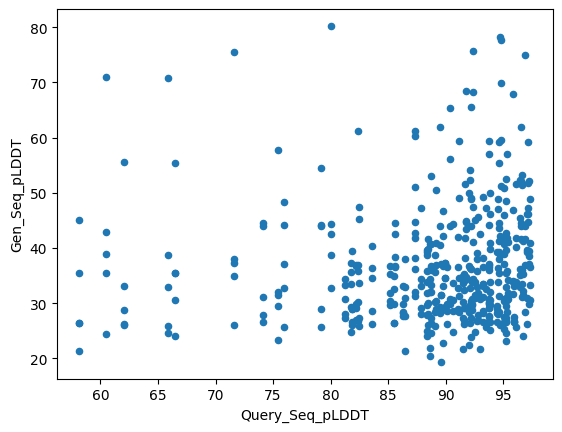

In [ ]:
df.plot(kind='scatter', x='Query_Seq_pLDDT', y='Gen_Seq_pLDDT')

In [ ]:
df_grp = df.groupby('Query_Seq_No').mean()

<Axes: xlabel='Query_Seq_pLDDT', ylabel='Gen_Seq_pLDDT'>

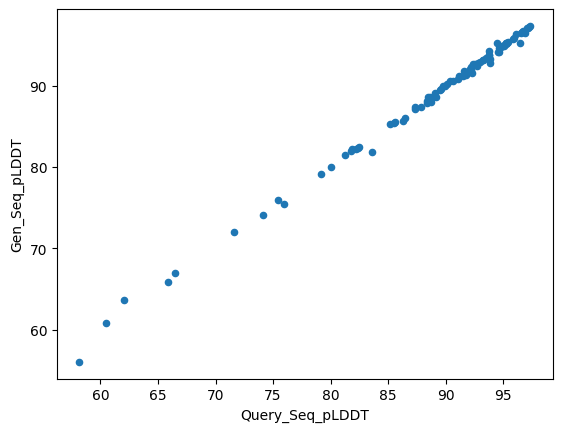

In [ ]:
df_grp.plot(kind='scatter', x='Query_Seq_pLDDT', y='Gen_Seq_pLDDT')

In [ ]:
from plotly import graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Query_Seq_No'], y=df['Query_Seq_pLDDT'], mode='markers', name='Query_Seq_pLDDT', marker_symbol="star"))
fig.add_trace(go.Box(x=df['Query_Seq_No'], y=df['Gen_Seq_pLDDT'], name='Gen_Seq_pLDDT'))
fig.update_layout(dict(xaxis_title='Query_Seq_No', yaxis_title='pLDDT'))
fig.show()

In [ ]:
k = 1

print("No of Gen_Seq_pLDDT>Query_Seq_pLDDT: ", len(df[(df['Gen_Seq_pLDDT'] > df['Query_Seq_pLDDT']+k)]))
print("No of Gen_Seq_pLDDT<Query_Seq_pLDDT: ", len(df[(df['Gen_Seq_pLDDT'] < df['Query_Seq_pLDDT']-k)]))
print(f"No of Gen_Seq_pLDDT and Query_Seq_pLDDT lie in same range(+-{k}): ", len(df[(df['Gen_Seq_pLDDT'] <= df['Query_Seq_pLDDT']+k) & (df['Gen_Seq_pLDDT'] >= df['Query_Seq_pLDDT']-k)]))

No of Gen_Seq_pLDDT>Query_Seq_pLDDT:  12
No of Gen_Seq_pLDDT<Query_Seq_pLDDT:  24
No of Gen_Seq_pLDDT and Query_Seq_pLDDT lie in same range(+-1):  414


### Analysis of TM-Score

Compile USalign, a library to perform structural alignment and calculate TM score

In [ ]:
%%bash
g++ -static -O3 -ffast-math -o USalign USalign.cpp

Compute the TM scores between Original and Generated Sequence Structures

In [ ]:
import glob
import subprocess
import pandas as pd
import os

if os.path.exists('output.tsv'):
    os.remove('output.tsv')

df = pd.DataFrame(columns=['Query_seq#', 'Gen_seq#', 'TM1', 'TM2', 'RMSD', 'ID1', 'ID2', 'IDali',
       'L1', 'L2', 'Lali'])

for q_seq in glob.glob(f'PDBs/QUERY_SEQUENCE_*'):
    i = int(q_seq.split('_')[-1].split('.')[0])

    for g_seq in glob.glob(f'PDBs/GENERATED_SEQUENCE_{i}_*'):
        j = int(g_seq.split('_')[-1].split('.')[0])
        subprocess.run(["./USalign", q_seq, g_seq, "-outfmt", "2"], stdout=open('output.tsv', 'w'))
        df_temp = pd.read_csv('output.tsv', sep='\t')
        df_temp['Query_seq#'] = i
        df_temp['Gen_seq#'] = j
        df_temp.drop(columns=['#PDBchain1',	'PDBchain2'], inplace=True)
        df = pd.concat([df, df_temp])
        df.reset_index(drop=True, inplace=True)

        os.remove('output.tsv')

In [ ]:
df.sort_values(by=['Query_seq#', 'Gen_seq#'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

Query_seq# Gen_seq#     TM1     TM2  RMSD    ID1    ID2  IDali   L1   L2  \
0            0        0  1.0000  1.0000  0.03  0.997  0.997  0.997  381  381   
1            0        1  1.0000  1.0000  0.02  0.997  0.997  0.997  381  381   
2            0        2  1.0000  1.0000  0.00  1.000  1.000  1.000  381  381   
3            0        3  1.0000  1.0000  0.03  0.997  0.997  0.997  381  381   
4            0        4  0.9997  0.9997  0.12  0.995  0.995  0.995  381  381   
..         ...      ...     ...     ...   ...    ...    ...    ...  ...  ...   
445         99        0  0.9995  0.9995  0.14  0.996  0.996  0.996  267  267   
446         99        1  0.9995  0.9995  0.14  0.996  0.996  0.996  267  267   
447         99        2  0.9999  0.9999  0.06  0.996  0.996  0.996  267  267   
448         99        3  0.9995  0.9995  0.14  0.996  0.996  0.996  267  267   
449         99        4  0.9995  0.9995  0.14  0.996  0.996  0.996  267  267   

    Lali  
0    381  
1    381  
2    381  
3    381  
4    381  
..   ...  
445  267  
446  267  
447  267  
448  267  
449  267  

[450 rows x 11 columns]

The TM score between generated sequences and query sequences for the sampled sequences

In [ ]:
from plotly import graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(x=df['Query_seq#'], y=df['TM2'], name='TM_score'))
fig.update_layout(dict(xaxis_title='Query_seq#', yaxis_title='TM_score'))
fig.show()

### Analysis using Self Perplexity (TO DO)

In [ ]:
!git clone https://github.com/microsoft/evodiff.git

Cloning into 'evodiff'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (704/704), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 2097 (delta 505), reused 651 (delta 476), pack-reused 1393 (from 1)
Receiving objects: 100% (2097/2097), 20.19 MiB | 18.23 MiB/s, done.
Resolving deltas: 100% (1350/1350), done.


In [ ]:
# Some Issue with ESM here. If you run this code, you won't get any output,
# but internally "Segmentation fault (core dumped)" error occurs

import subprocess
import glob
import os
import shutil

if os.path.exists('scores'):
    shutil.rmtree('scores')

os.makedirs('scores')

for qseq in glob.glob('PDBs/QUERY_SEQUENCE_*.pdb'):
    i = int(qseq.split('_')[-1].split('.')[0])
    os.makedirs(f'scores/sequence_{i}')
    print(f'Processing QUERY_SEQUENCE_{i}')
    subprocess.run(["python", "evodiff/analysis/downstream_bash_scripts/sample_sequences.py", qseq, "--chain" ,"A" , "--temperature", "1", "--num-samples", "1", "--outpath", f"scores/sequence_{i}/QUERY_SEQUENCE_{i}.fasta"])
    subprocess.run(["python", "evodiff/analysis/downstream_bash_scripts/score_log_likelihoods.py", qseq, f"scores/sequence_{i}/QUERY_SEQUENCE_{i}.fasta", "--chain","A", "--outpath", f"scores/sequence_{i}/QUERY_SEQUENCE_{i}.csv" ],  stdout=open('output.txt', 'w'))

    for gseq in glob.glob(f'PDBs/GENERATED_SEQUENCE_{i}_*.pdb'):
        filename = os.path.basename(gseq).split('.')[0]
        print('Processing', filename)
        j = int(filename.split('_')[-1])
        subprocess.run(["python", "evodiff/analysis/downstream_bash_scripts/sample_sequences.py", gseq, "--chain","A" , "--temperature","1", "--num-samples","1", "--outpath", f"scores/sequence_{i}/GENERATED_SEQUENCE_{i}_{j}.fasta"])
        subprocess.run(["python", "evodiff/analysis/downstream_bash_scripts/score_log_likelihoods.py", gseq, f"scores/sequence_{i}/GENERATED_SEQUENCE_{i}_{j}.fasta", "--chain", "A", "--outpath", f"scores/sequence_{i}/GENERATED_SEQUENCE_{i}_{j}.csv" ])

### Per residue Analysis

#### Per residue Analysis of pLDDT scores

In [71]:
import pdbreader
import glob
import pandas as pd

df = pd.DataFrame(columns=['QSeq_No', "GSeq_No", "resid", "Q_pLDDT", "G_pLDDT", "Q_res", "G_res"])

for q_seq in glob.glob(f'PDBs/QUERY_SEQUENCE_*'):
    pdb_q = pdbreader.read_pdb(q_seq)
    i = int(q_seq.split('_')[-1].split('.')[0])

    q_plddt_ls = pdb_q['ATOM'].groupby('resid')['b_factor'].mean().to_list()

    for g_seq in glob.glob(f'PDBs/GENERATED_SEQUENCE_{i}_*'):
        pdb_g = pdbreader.read_pdb(g_seq)
        j = int(g_seq.split('_')[-1].split('.')[0])

        g_plddt_ls = pdb_g['ATOM'].groupby('resid')['b_factor'].mean().to_list()
        if len(q_plddt_ls) != len(g_plddt_ls):
            print(i, j)
            print(len(q_plddt_ls), len(g_plddt_ls))
            print(q_plddt_ls)
            print(g_plddt_ls)
            continue

        for k, g_plddt in enumerate(g_plddt_ls):
            df.loc[len(df)] = [i, j, k, q_plddt_ls[k], g_plddt, pdb_q['ATOM']['resname'].iloc[k], pdb_g['ATOM']['resname'].iloc[k]]

16 3
188 189
[97.88, 98.59, 98.45, 98.26, 97.27, 95.35, 92.3, 88.7, 82.08, 90.03, 96.29, 96.23, 96.79, 97.64, 98.11, 97.82, 97.95, 98.22, 98.22, 97.86, 97.75, 97.55, 98.04, 98.3, 98.35, 98.14, 98.14, 97.71, 96.13, 96.26, 96.83, 97.19, 97.45, 97.35, 96.79, 96.0, 97.98, 97.83, 98.28, 98.48, 98.38, 97.45, 96.71, 90.54, 87.57, 88.2, 88.18, 88.87, 90.7, 91.78, 92.32, 94.5, 94.39, 92.96, 94.56, 95.32, 95.36, 96.64, 96.06, 97.4, 97.15, 96.76, 97.17, 97.24, 95.98, 95.92, 95.39, 95.31, 96.66, 97.96, 98.4, 97.73, 96.97, 94.21, 94.23, 96.03, 97.0, 96.31, 95.98, 97.0, 97.31, 96.57, 96.43, 95.26, 94.59, 91.0, 86.42, 77.39, 75.03, 69.78, 87.05, 93.84, 95.58, 96.67, 97.52, 97.93, 97.32000000000001, 96.76, 95.07, 91.72, 87.93, 87.93, 85.28, 73.23, 69.72, 65.97, 67.12, 75.93, 84.2, 91.6, 93.68, 94.76, 96.83, 97.61, 97.96999999999998, 98.19, 98.17, 96.79, 97.62, 97.41, 97.6, 96.93, 97.57999999999998, 96.36, 95.1, 95.35, 94.24, 90.54, 90.08, 93.07, 94.59, 95.08, 97.29, 96.83, 97.11, 97.46, 96.87, 94.88, 

pLDDT plot of Generated vs Query residues, with colors as the sequence number

<Axes: xlabel='Q_pLDDT', ylabel='G_pLDDT'>

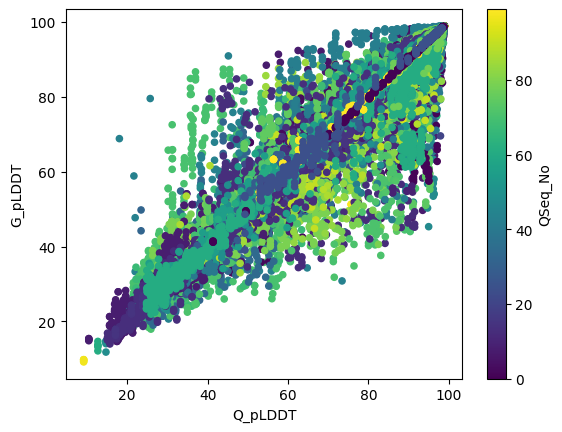

In [72]:
df.plot(kind='scatter', x='Q_pLDDT', y='G_pLDDT', c='QSeq_No', colormap='viridis')

In [73]:
import plotly.express as px

fig = px.scatter(x=df['Q_pLDDT'],y=df['G_pLDDT'], color=df['QSeq_No'])
fig.update_layout(dict(xaxis_title='Q_pLDDT', yaxis_title='G_pLDDT'))
fig.show()

pLDDT of residues for a particular pair of sequences

<Axes: xlabel='Q_pLDDT', ylabel='G_pLDDT'>

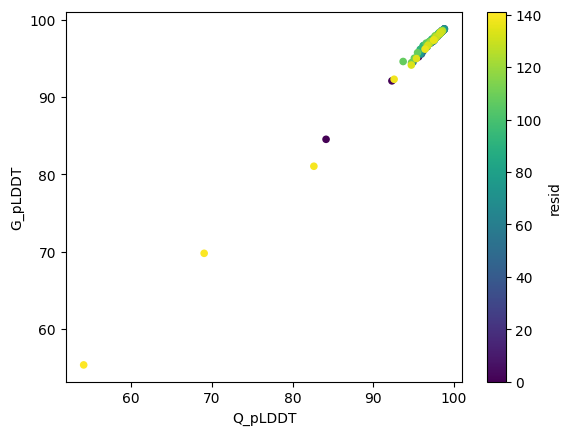

In [86]:
Qseqid = 17     # index of Query sequence in the dataset
Gseqid = 4      # index of Generated Sequence for the query sequence

df[(df['QSeq_No'] == Qseqid) & (df['GSeq_No']==Gseqid)].plot(kind='scatter', x='Q_pLDDT', y='G_pLDDT', c='resid', colormap='viridis')

In [75]:
import plotly.express as px

df_sub = df[(df['QSeq_No'] == Qseqid)]
fig = px.scatter(x=df_sub['Q_pLDDT'],y=df_sub['G_pLDDT'], color=df_sub['GSeq_No'])
fig.update_layout(dict(xaxis_title='Q_pLDDT', yaxis_title='G_pLDDT'), coloraxis=dict(colorbar = dict(title="GSeq_No")))
fig.show()

#### Mutation Frequency Heatmap

<Axes: xlabel='G_res', ylabel='Q_res'>

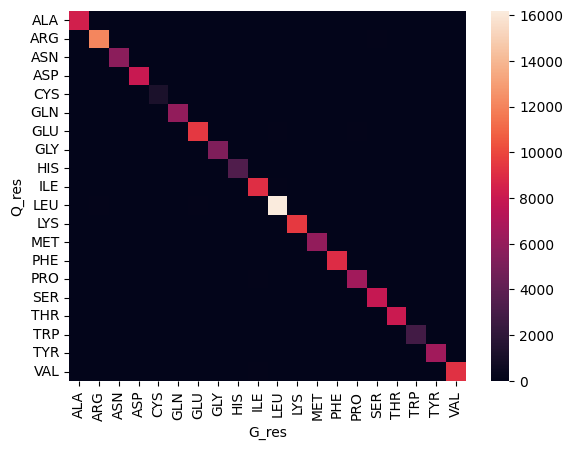

In [78]:
import seaborn as sns
from math import log

df2 = pd.crosstab(df['Q_res'], df['G_res'])
sns.heatmap(df2)

<Axes: xlabel='G_res', ylabel='Q_res'>

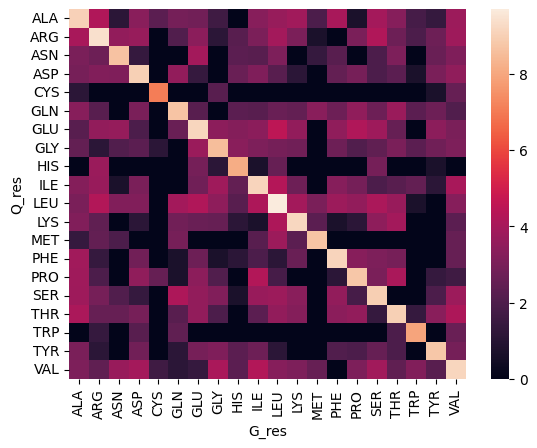

In [80]:
df2 = df2.apply(lambda x: x.apply(lambda y: log(y+1)))
sns.heatmap(df2)

In [81]:
seq_id = 67

plddt_mat = []

df_sel = df[(df['QSeq_No'] == seq_id) & (df['GSeq_No']==0)]
plddt_mat += [df_sel['Q_pLDDT'].to_list()]

for i in range(5):
    df_sel = df[(df['QSeq_No'] == seq_id) & (df['GSeq_No']==i)]
    plddt_mat += [df_sel['G_pLDDT'].to_list()]


fig = px.imshow(plddt_mat, height=400, aspect="auto")
fig.update_layout(dict(xaxis_title='Residue id', yaxis_title='Sequence id'), coloraxis=dict(colorbar = dict(title="pLDDT")))
fig.show()



### Structure Visualisation

In [82]:
!pip install py3Dmol

In [87]:
import py3Dmol

qseq_id = 17

view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js')
view.addModel(open(f'/content/EvoDiff_active_site/PDBs/QUERY_SEQUENCE_{qseq_id}.pdb','r').read(),'pdb')

# view.setStyle({'cartoon': {'colorscheme': {'prop':'b','gradient': 'roygb','min':0.0,'max':100}}}) # as color is set to lDDT
view.setStyle({'cartoon': {'color':'white'}})
view.addSurface(py3Dmol.VDW,{'opacity':0.7,'colorscheme':{'prop':'b','gradient':'sinebow','min':0,'max':90}})

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [88]:
gseq_id = 1

view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js')
view.addModel(open(f'/content/EvoDiff_active_site/PDBs/GENERATED_SEQUENCE_{qseq_id}_{gseq_id}.pdb','r').read(),'pdb')

# view.setStyle({'cartoon': {'colorscheme': {'prop':'b','gradient': 'roygb','min':0.0,'max':100}}}) # as color is set to lDDT
view.setStyle({'cartoon': {'color':'white'}})
view.addSurface(py3Dmol.VDW,{'opacity':0.7,'colorscheme':{'prop':'b','gradient':'sinebow','min':0,'max':90}})

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.